# 0. Notebook Introduction

<span style="margin-bottom:0px; padding-bottom:0px;">
    <img src="https://www.civo.com/assets/logo-28e013cd1630517ca866d2993d8e4258232006dcd30795774d54288396d69c8a.svg" style="width:100px; heigh:100px;"/>
    <h2 style="display:inline;">  - The Cloud Native Service Provider</h2>
</span>
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>
<div>
    <b> Quick Links:</b>
    <a href="https://www.civo.com/">Civo Home </a> |
    <a href="https://www.civo.com/docs/machine-learning">KfaaS Docs </a> |
    <a href="https://www.civo.com/machine-learning">Civo Machine Learning </a> |
    <a href="https://www.civo.com/docs">Civo Docs </a>
</div>

<div>
    <i>Please Note: This example has been modified by <a href="https://www.civo.com/" target="_blank">civo.com</a> for use with the <strong>Kubeflow as a Service</strong> product. All rights and credit belong to the original authors.</i>
</div>
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

<div style="text-align:center;">
    <h1 style="font-weight:bold; margin-top:10px; padding-top:10px; padding-bottom:0px; margin-bottom:0px;">Civo KfaaS - PyTorch MNIST Tutorial</h1>
    <h4 style="margin-top:0px; padding-top:0px; padding-bottom:0px; margin-bottom:5px;">Author: josh@civo.com</h4>
    <img src="https://miro.medium.com/v2/resize:fit:1200/1*3DUs-90altOgaBcVJ9LTGg.png" style="border-radius:5px; width:60%; padding:20px; padding-top:0px; margin-top:0px;">
</div>


### 🚧 Project Description:
- The MNIST example in the PyTorch examples repository is a basic introduction to training a simple convolutional neural network (CNN) on the MNIST dataset. The MNIST dataset contains handwritten digits and is a standard dataset used in the machine learning community for benchmarking and introduction to deep learning.
### 📈 Dataset:
- The MNIST dataset is composed of 28x28 grayscale images of handwritten digits (from 0 to 9).
It is split into 60,000 training images and 10,000 test images.
### 🧠 Neural Network Architecture:
- The example typically employs a simple CNN architecture. This network has a few convolutional layers followed by fully connected layers. Activation functions like ReLU and techniques such as max-pooling may be used in between these layers.
Dropout might also be utilized to prevent overfitting.
### 🏃‍♀️ Training:
- The network is trained using a common optimization algorithm, such as Stochastic Gradient Descent (SGD), to minimize a loss function (e.g., cross-entropy loss for classification tasks). The training loop includes forward propagation, loss computation, backpropagation, and optimization steps.
### 🧪 Evaluation:
- After training, the network is evaluated on the test dataset to determine its accuracy in recognizing handwritten digits that it hasn't seen during training.
### ⚙️ Configurations/Parameters:
- The code usually supports various ways to modify hyperparameters, such as learning rate, batch size, number of epochs, etc. This flexibility makes it easier to experiment with different settings.
### 🛠️ Dependencies:
- The primary dependency is PyTorch, the deep learning framework on which the example is built. Additionally, torchvision might be used for dataset loading and transformations.
### 📝 References:
- https://github.com/pytorch/examples/blob/main/mnist/main.py

# 1. KfaaS Setup
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

Please refer to: XXXXXX  for information regarding the setup of your KfaaS Cluster

# 2. Environment Setup 
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

In [1]:
# Install the Python Packages in requirements.txt
! pip install -U -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# Ensure compatibility between Python 2 and Python 3.
# This allows the use of the print function from Python 3 in Python 2.
# It's a good practice for Python 2 and 3 interoperability, but it's less relevant now as Python 2 is officially retired.
from __future__ import print_function

# Import the main PyTorch library. It provides tensor computation and deep neural networks.
import torch

# Import the neural network module from PyTorch. 
# This provides classes to build and train neural networks.
import torch.nn as nn

# Import the functional API of PyTorch's neural network module.
# This provides functions (like activation functions and loss functions) that don't have any parameters.
import torch.nn.functional as F

# Import the optimization module from PyTorch.
# This provides common optimization algorithms like SGD, Adam, and Adadelta.
import torch.optim as optim

# Import datasets and transformations from torchvision.
# Torchvision is a library that provides popular datasets, model architectures, and image transformations for computer vision.
from torchvision import datasets, transforms

# Import the learning rate scheduler from PyTorch's optimization module.
# This allows for changing the learning rate during training based on the number of epochs.
from torch.optim.lr_scheduler import StepLR

# import the matplotlib plotting library to plot the loss and accuracy curves.
# this is not required for training the model, but it's useful to visualize the model.
import matplotlib.pyplot as plt


import numpy as np
import torch.nn.functional as F
import torch
from sklearn.metrics import confusion_matrix
import itertools

from tqdm import tqdm


/Users/josh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 3. Define Parameters
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

In [3]:
class Params:
    def __init__(self):
        # The number of training examples in one forward/backward pass (one iteration).
        # The higher the batch size, the more memory required.
        self.batch_size = 64

        # The number of test examples used in one forward pass when evaluating the model.
        # Typically, a larger batch size can be used for testing as backpropagation (which requires more memory) is not performed.
        self.test_batch_size = 1000

        # Number of times the entire training dataset will be presented to the model.
        # One epoch means one forward and one backward pass of all training examples.
        self.epochs = 14

        # Learning rate for the optimizer. Determines the step size at each iteration 
        # while moving towards a minimum of the loss function.
        self.lr = 1.0

        # Used for learning rate scheduling. 
        # The learning rate is multiplied by this factor after each epoch.
        # Values usually between 0 and 1 to decrease the learning rate over epochs.
        self.gamma = 0.7

        # If set to True, it will disable training on CUDA (GPU) even if it's available.
        # Useful for debugging on CPU or in environments without a GPU.
        self.no_cuda = False

        # If set to True, it will disable training on macOS GPU.
        # Specific to environments running macOS with GPU capabilities.
        self.no_mps = False

        # If set to True, only one batch of the training data will be used.
        # Useful for quickly checking if the training loop works.
        self.dry_run = False

        # Seed for generating random numbers. 
        # Ensures reproducibility across runs if other factors remain constant.
        self.seed = 1

        # Determines how often training progress (loss value) will be printed to the console.
        # For example, if set to 10, every 10 batches the training loss will be printed.
        self.log_interval = 10

        # If set to True, the trained model will be saved to disk.
        self.save_model = False

args = Params()


# 4. Visualise Parameters
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

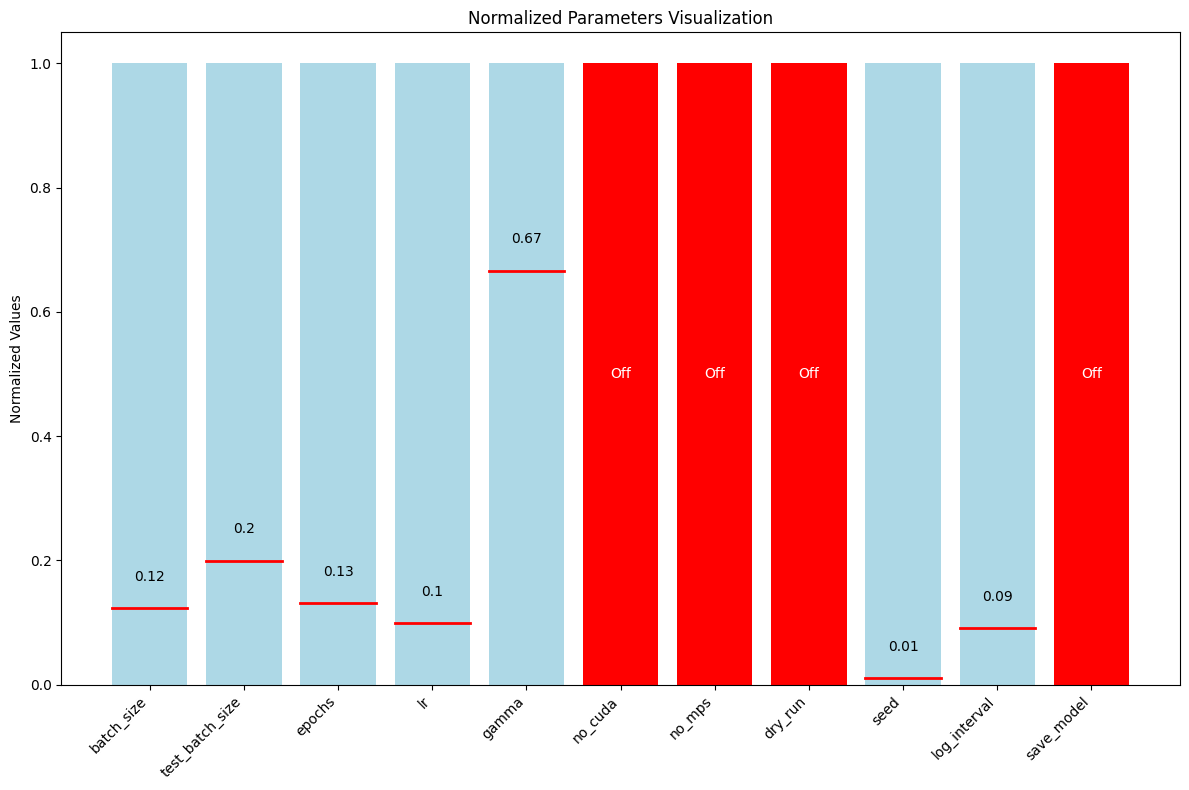

In [4]:
# Define the parameters and their bounds for hyperparameter optimization
params = {
    "batch_size": [1, 512],
    "test_batch_size": [1, 5000],
    "epochs": [1, 100],
    "lr": [0.001, 10.0],
    "gamma": [0.1, 1.0],
    "no_cuda": [0, 1],
    "no_mps": [0, 1],
    "dry_run": [0, 1],
    "seed": [0, 100],
    "log_interval": [1, 100],
    "save_model": [0, 1]
}

# Extract the actual values of the parameters from an assumed 'args' object
values = {
    "batch_size": args.batch_size,
    "test_batch_size": args.test_batch_size,
    "epochs": args.epochs,
    "lr": args.lr,
    "gamma": args.gamma,
    "no_cuda": int(args.no_cuda),
    "no_mps": int(args.no_mps),
    "dry_run": int(args.dry_run),
    "seed": args.seed,
    "log_interval": args.log_interval,
    "save_model": int(args.save_model)
}

# Get the list of parameter names for further processing
params_names = list(params.keys())

# Compute the normalized values of the parameters based on their bounds
normalized_values = {param: (values[param] - params[param][0]) / (params[param][1] - params[param][0]) 
                     for param in params_names}

# Set up dictionaries to map boolean values to colors and labels for visualization
bool_colors = {
    True: "green",
    False: "red"
}
bool_labels = {
    True: "On",
    False: "Off"
}

# Initialize a figure for plotting the parameters
fig, ax = plt.subplots(figsize=(12, 8))

# Create visualization bars for each parameter
for param in params_names:
    if param in ["no_cuda", "no_mps", "dry_run", "save_model"]:
        # Handle boolean parameters
        bar = ax.bar(param, 1, color=bool_colors[bool(values[param])])
        ax.text(bar[0].get_x() + bar[0].get_width() / 2, 0.5, bool_labels[bool(values[param])],
                ha='center', va='center', color='white', fontsize=10)
    else:
        # Handle numeric parameters
        bar = ax.bar(param, 1, color='lightblue')
        height = normalized_values[param]
        # Draw a red line indicating the normalized value of the parameter
        ax.plot([bar[0].get_x(), bar[0].get_x() + bar[0].get_width()], [height, height], color="red", lw=2)
        # Display the actual normalized value above the red line
        ax.text(bar[0].get_x() + bar[0].get_width() / 2, height + 0.05, str(round(height, 2)), ha='center', va='center', color='black', fontsize=10)

# Set title and labels
ax.set_title('Normalized Parameters Visualization')
ax.set_ylabel('Normalized Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display the plot
plt.show()


# 4. Create Neural Network
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>


<div style="font-family: 'Roboto', sans-serif; border:0px solid #e0e0e0; width: 80%; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2);">
    <h3 style="margin-bottom:0px; padding-bottom:0px;" >Neural Network Architecture:</h3>
    <div style="border-radius: 8px; overflow: hidden;  box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.1); background-color: #ffffff; margin-top: 20px; width:95%;">
        <table border="0" cellpadding="5" style="border-collapse: collapse; width:100%; margin-top: 20px;">
            <tr>
                <td colspan="2" style="background-color: #f5f5f5;  color: #616161;">Input Image (1 channel)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Conv1</td>
                <td style="color: #757575;">Convolution (1 to 32 channels, 3x3 kernel)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">ReLU</td>
                <td style="color: #757575;">Activation Function</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Conv2</td>
                <td style="color: #757575;">Convolution (32 to 64 channels, 3x3 kernel)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">ReLU</td>
                <td style="color: #757575;">Activation Function</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Max Pool</td>
                <td style="color: #757575;">Max Pooling (2x2 window)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Dropout1</td>
                <td style="color: #757575;">25% Dropout</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Flatten</td>
                <td style="color: #757575;">Flatten tensor</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">FC1</td>
                <td style="color: #757575;">Fully Connected (9216 to 128)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">ReLU</td>
                <td style="color: #757575;">Activation Function</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Dropout2</td>
                <td style="color: #757575;">50% Dropout</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">FC2</td>
                <td style="color: #757575;">Fully Connected (128 to 10)</td>
            </tr>
<tr>
            <td colspan="2" style="background-color: #f5f5f5; text-align:center; padding: 20px 0; color: #616161;">
                Output Classes (Log Probabilities)
                <div style="margin-top:20px; display: flex; justify-content: space-between;">
                    <svg height="30" width="300">
                        <g transform="translate(0,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">0</text>
                        </g>
                        <g transform="translate(30,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">1</text>
                        </g>
                        <g transform="translate(60,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">2</text>
                        </g>
                        <g transform="translate(90,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">3</text>
                        </g>
                        <g transform="translate(120,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">4</text>
                        </g>
                        <g transform="translate(150,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">5</text>
                        </g>
                        <g transform="translate(180,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">6</text>
                        </g>
                        <g transform="translate(210,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">7</text>
                        </g>
                        <g transform="translate(240,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">8</text>
                        </g>
                        <g transform="translate(270,0)">
                            <rect x="0" y="10" width="28" height="10" style="fill:#ECEFF1;stroke-width:1;stroke:#CFD8DC" />
                            <text x="14" y="18" fill="#616161" font-size="10" text-anchor="middle">9</text>
                        </g>
                    </svg>
                </div>
            </td>
        </tr>
        </table>
    </div>
    Lora ipsum write some text in heree....
</div>


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Convolutional layer
        # Parameters:
        # - Number of input channels: 1 (assuming grayscale images)
        # - Number of output channels (filters): 32
        # - Kernel size: 3x3
        # - Stride: 1 (default)
        self.conv1 = nn.Conv2d(1, 32, 3, 1)

        # Convolutional layer
        # Parameters:
        # - Number of input channels: 32 (from previous layer)
        # - Number of output channels (filters): 64
        # - Kernel size: 3x3
        # - Stride: 1 (default)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)

        # Dropout layer to prevent overfitting
        # Drops out 25% of the input units randomly to prevent overfitting
        self.dropout1 = nn.Dropout(0.25)

        # Dropout layer to prevent overfitting
        # Drops out 50% of the input units randomly to prevent overfitting
        self.dropout2 = nn.Dropout(0.5)

        # Fully connected (dense) layer
        # Parameters:
        # - Number of input features: 9216 (resulting from the previous layers)
        # - Number of output features: 128
        self.fc1 = nn.Linear(9216, 128)

        # Fully connected (dense) layer
        # Parameters:
        # - Number of input features: 128 (from previous layer)
        # - Number of output features: 10 (assuming 10 classes for classification)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Passing input through the first convolutional layer
        x = self.conv1(x)
        # Applying ReLU (Rectified Linear Unit) activation function
        x = F.relu(x)

        # Passing through the second convolutional layer
        x = self.conv2(x)
        # Applying ReLU activation function
        x = F.relu(x)

        # Applying max pooling with a 2x2 window size to reduce spatial dimensions
        x = F.max_pool2d(x, 2)

        # Applying the first dropout layer
        x = self.dropout1(x)

        # Flattening the tensor for the fully connected layers
        x = torch.flatten(x, 1)

        # Passing through the first fully connected layer
        x = self.fc1(x)
        # Applying ReLU activation function
        x = F.relu(x)

        # Applying the second dropout layer
        x = self.dropout2(x)

        # Passing through the second fully connected layer
        x = self.fc2(x)

        # Applying the log softmax activation to get log probabilities for each class
        # Setting dim=1 ensures that the softmax is applied across the correct dimension
        output = F.log_softmax(x, dim=1)

        return output

# 5. Create Training and Testing Functions
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

<div style="font-family: 'Roboto', sans-serif; border:0px solid #e0e0e0; width: 80%; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2)">
    <h3 style="margin-bottom:0px; padding-bottom:0px;" >Training Function:</h3>
        <table border="0" cellpadding="5" style="border-collapse: collapse; width:100%;">
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Function Signature</td>
                <td style="color: #757575;">def train(args, model, device, train_loader, optimizer, epoch):</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Set Model Mode</td>
                <td style="color: #757575;">model.train()</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Training Loop</td>
                <td style="color: #757575;">For each batch in train_loader:</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Data Transfer</td>
                <td style="color: #757575;">Transfer data and target to device</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Zero Gradients</td>
                <td style="color: #757575;">optimizer.zero_grad()</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Forward Pass</td>
                <td style="color: #757575;">Compute predictions: output = model(data)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Compute Loss</td>
                <td style="color: #757575;">loss = F.nll_loss(output, target)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Backward Pass</td>
                <td style="color: #757575;">Compute gradients: loss.backward()</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Optimization Step</td>
                <td style="color: #757575;">optimizer.step()</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Logging</td>
                <td style="color: #757575;">Print logs at specified intervals</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Dry Run Check</td>
                <td style="color: #757575;">Exit loop if dry_run is set to True</td>
            </tr>
        </table>
    </div>
</div>


In [6]:
def train(args, model, device, train_loader, optimizer, epoch):
    # Setting the model in training mode.
    # This is important for layers like dropout and batch normalization
    # which behave differently during training and evaluation.
    model.train()
    
    # Initialize a progress bar using tqdm. Wrapping the train_loader with tqdm will handle the progress bar updates.
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}")
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(pbar):
        
        # Transfer data and target labels to the given device (either CPU or GPU)
        data, target = data.to(device), target.to(device)
        
        # Zero out gradients from the previous iteration.
        # In PyTorch, gradients accumulate, so they need to be reset on each iteration.
        optimizer.zero_grad()
        
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # Compute the negative log likelihood loss between the model output and the actual targets.
        loss = F.nll_loss(output, target)
        
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        
        # Perform a single optimization step (parameter update)
        optimizer.step()
        
        # Update the progress bar description with the current loss
        pbar.set_description(f"Epoch {epoch} Loss: {loss.item():.6f}")
        
        # If dry_run is set, exit after the first batch to quickly check the training loop
        if args.dry_run:
            break


<div style="font-family: 'Roboto', sans-serif; border:0px solid #e0e0e0; width: 80%; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2)">
    <h3 style="margin-bottom:0px; padding-bottom:0px;" >Test Function:</h3>
        <table border="0" cellpadding="5" style="border-collapse: collapse; width:100%;">
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Function Signature</td>
                <td style="color: #757575;">def test(model, device, test_loader):</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Set Model Mode</td>
                <td style="color: #757575;">model.eval()</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Initialize Test Loss</td>
                <td style="color: #757575;">test_loss = 0</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Initialize Correct Count</td>
                <td style="color: #757575;">correct = 0</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Evaluation Loop</td>
                <td style="color: #757575;">For each batch in test_loader (with gradients disabled):</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Data Transfer</td>
                <td style="color: #757575;">Transfer data and target to device</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Forward Pass</td>
                <td style="color: #757575;">Compute predictions: output = model(data)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Compute Loss</td>
                <td style="color: #757575;">Sum up the batch loss: test_loss += F.nll_loss(output, target, reduction='sum').item()</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Predicted Label</td>
                <td style="color: #757575;">Get index of max log-probability: pred = output.argmax(dim=1, keepdim=True)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Count Correct Predictions</td>
                <td style="color: #757575;">Count matching predictions: correct += pred.eq(target.view_as(pred)).sum().item()</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Average Test Loss</td>
                <td style="color: #757575;">Average the loss over the dataset: test_loss /= len(test_loader.dataset)</td>
            </tr>
            <tr>
                <td style="background-color: #ECEFF1; text-align:center; color: #616161;">Print Results</td>
                <td style="color: #757575;">Print test loss and accuracy</td>
            </tr>
        </table>
    </div>
</div>


In [7]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
def test(model, device, test_loader):
    # Setting the model in evaluation mode. 
    # This is important for layers like dropout and batch normalization 
    # which behave differently during training and evaluation.
    model.eval()

    # Initialize the test loss to zero
    test_loss = 0

    # Initialize a count of the number of correct predictions to zero
    correct = 0
    
    # List to store all the predictions and true labels to compute confusion matrix
    all_preds = []
    all_targets = []

    # Disable gradient computations. 
    # Since we're only doing forward passes during testing, 
    # we don't need to compute gradients which speeds up the process.
    with torch.no_grad():
        # Loop over each batch from the test set
        for data, target in test_loader:
            # Transfer data and target labels to the given device (either CPU or GPU)
            data, target = data.to(device), target.to(device)

            # Forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)

            # Sum up the negative log likelihood loss for the entire test set
            test_loss += F.nll_loss(output, target, reduction='sum').item()

            # Get the index of the maximum log-probability as the predicted label
            pred = output.argmax(dim=1, keepdim=True)

            # Append the predictions and true labels for the batch to the respective lists
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

            # Count how many predictions match the actual target labels
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Average the total loss over the number of samples in the test set
    test_loss /= len(test_loader.dataset)

    # Print the average test loss and the accuracy of the model on the test set

    # Compute the confusion matrix using sklearn's utility function
    cm = confusion_matrix(all_targets, all_preds)
    # Define the class names for MNIST dataset
    class_names = [str(i) for i in range(10)]
    # Plot the confusion matrix
    
    
    dataset_length = len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    
    # print('Test Data Set Results:\n')
    # # print('\t Average loss: \t {:.4f},\n Accuracy: \t {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))
    # print('Average loss: {:.4f}'.format(test_loss))
    # print('Accuracy: {}/{} ({:.0f}%)'.format(correct, dataset_length, accuracy))
    # print('Confusion Matrix: \n {}'.format(cm))
    
    # create a test result to be returned.
    test_result = {
        'dataset_length': dataset_length,
        'accuracy': accuracy,
        'cm': cm,
        'test_loss': test_loss,
        'correct': correct
    }
    
    
    return test_result
    
    
    
    # print(cm)
    # plot_confusion_matrix(cm, class_names)

# 6. Initialise the Processing Device
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

<div style="padding-left:20px;">

<div style="width:100%; text-align:center; border-radius:5px;">
<h3 style="margin-bottom:0px; padding-bottom:0px;" >PyTorch GPU Architecture:</h3>
    <img src="https://cnvrg.io/wp-content/uploads/2021/01/data-batch.png" style="width:600px; background-color:white;"> </img>
</div>


</div>

In [15]:
# TODO: maybe move to setup?????

# Determine if CUDA (NVIDIA's parallel computing platform and programming model) should be used.
# `use_cuda` will be True if the user hasn't disabled CUDA with `args.no_cuda` and if CUDA is available on the machine.
use_cuda = not args.no_cuda and torch.cuda.is_available()

# Determine if MPS (Metal Performance Shaders) should be used. 
# MPS is specific to Apple devices. `use_mps` will be True if the user hasn't disabled MPS with `args.no_mps` 
# and if MPS is available on the machine.
use_mps = not args.no_mps and torch.backends.mps.is_available()

# Set the seed for generating random numbers in PyTorch. 
# This ensures that results are reproducible if all other configurations and the dataset remain constant.
torch.manual_seed(args.seed)

# Decide on which device the computations will be performed. 
# The device can be CUDA (GPU), MPS (Apple's GPU), or CPU based on availability and user's preference.
if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# 5. Create Data Loaders
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg" style="width:100%; padding-top:0px margin-top:0px; padding-bottom:0px margin-bottom:0px;"/>

In [16]:


# Create a dictionary to hold training settings, starting with batch size.
train_kwargs = {'batch_size': args.batch_size}

# Create a dictionary to hold test settings, starting with batch size.
test_kwargs = {'batch_size': args.test_batch_size}

# If CUDA is being used, additional arguments related to CUDA are added to both training and test settings.
# These ensure efficient data transfer between CPU and GPU.
if use_cuda:
    cuda_kwargs = {'num_workers': 1,       # Number of subprocesses to use for data loading. 
                                            # 1 means data loading will be done in the main process.
                   'pin_memory': True,      # Pin memory ensures faster data transfer from CPU to CUDA.
                   'shuffle': True}         # Shuffle the dataset before training. 
                                            # This provides a random order of data input for each epoch.
    
    # Update training and test settings with the additional CUDA-related settings.
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)


<div style="font-family: 'Roboto', sans-serif; border:0px solid #e0e0e0; padding: 20px; width: 60%; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2);">
    <h3 style="margin-bottom:0px; padding-bottom:0px;" >PyTorch Data Loader:</h3>
    <p>
        Here we create a Pytorch Data Loader to manage the training and test data. Torch DataLoaders work by xxxxxxx
    </p>
    <img style="height:500px;" src="https://sebastianraschka.com/images/blog/2022/datapipes/loader-flow.png"> </img>
</div>

# 6. Create Datasets
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg"/> 

In [17]:
# Define the data transformations:
# 1. Convert image data into PyTorch tensors.
# 2. Normalize the image data with a given mean and standard deviation. 
#    This is specifically for MNIST where the mean is around 0.1307 and the standard deviation is around 0.3081.
#    Normalizing helps in stabilizing the training process and makes the model less sensitive to the scale of the features.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Define the training dataset:
# 1. The MNIST dataset is loaded from the "/data" directory.
# 2. If the dataset doesn't exist in the directory, it will be downloaded.
# 3. The dataset will undergo the transformations defined above.
dataset1 = datasets.MNIST('data/', train=True, download=True, transform=transform)

# Define the test dataset (similar to the training dataset, but with `train=False` to load test data).
dataset2 = datasets.MNIST('data/', train=False, transform=transform)

# Create PyTorch DataLoaders:
# DataLoaders provide a way to efficiently load data in batches, which is especially useful for training deep learning models.

# Training DataLoader: Uses the training dataset and the training settings defined earlier.
train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)

# Test DataLoader: Uses the test dataset and the test settings defined earlier.
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)


<div style="font-family: 'Roboto', sans-serif; border:0px solid #e0e0e0; padding: 20px; width: 70%; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2);">
    <h3 style="margin-bottom:0px; padding-bottom:0px;" >Creating Dataset:</h3>
    <p>
        Here we show the input data type being segmented into output classifications.....XXXXXXX
    </p>
<div style="display: flex; align-items: center;">
    <img src="https://raw.githubusercontent.com/jkotra/mnist-keras/master/mnist.png" style="width:40%; border: 1px solid #ddd;">
    <div style="font-size: 150px; line-height: 150px; width:15%; padding-left:25px; padding-right:25px; ">→</div>
    <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*9jCey4wywZ4Os7hF.png" style="width:40%; border: 1px solid #ddd;">
</div></div>

# 6. Run Model
<img src="https://www.civo.com/assets/public/machine-learning/gradient-divider-13b90e98503fdac947c77d8cdb6bf55f3af7186422ff7e4bea759e34eb5767c5.svg"/> 

In [74]:
# Define spacers for cleaner print outputs
def print_spacer(content, spacer_char, total_width=80):
    """Generate a spacer with centered content."""
    # Calculate the length of the spacer on each side of the content
    spacer_length = (total_width - len(content)) // 2
    
    # Generate the spacer
    spacer = spacer_char * spacer_length
    print("{}{}{}".format(spacer, content, spacer))

# Instantiate the neural network model (assuming the Net class has been defined earlier).
# Transfer the model to the chosen computation device (either CPU or GPU).
model = Net().to(device)

# Define the optimizer:
# Adadelta is an adaptive learning rate optimization algorithm that adjusts the learning rate over time.
# This makes it require less manual tuning of the learning rate.
# We pass in the model's parameters and specify the learning rate from the provided arguments.
optimizer = optim.Adadelta(model.parameters(), lr=args.lr)

# Define a learning rate scheduler:
# StepLR decreases the learning rate by a factor (gamma) after a specified number of epochs (step_size).
# This helps in reducing the learning rate as training progresses.
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)

# Lists to keep track of the loss and accuracy values after each epoch
previous_loss = []
previous_accuracy = []

# Start the main training loop
for epoch in range(1, args.epochs + 1):
    # Print the current epoch number for clarity
    print_spacer(" Epoch: " + str(epoch) + " ", "*")

    # Train the model on the training dataset
    train(args, model, device, train_loader, optimizer, epoch)
    
    # Evaluate the model on the test dataset and store the results
    test_result = test(model, device, test_loader)
    
    # Print test results
    print_spacer(" Results: ", "-")
    print('Model Performance:')
    print('\t-> Average loss: \t{:.4f}'.format(test_result['test_loss']))
    print('\t-> Accuracy: \t\t{}/{} ({:.0f}%)'.format(test_result['correct'], test_result['dataset_length'], test_result['accuracy']))
    print_spacer(" Confusion Matrix: ", "-")
    print('\n {} \n'.format(test_result['cm']))

    # If it's not the first epoch, calculate and print the change in loss and accuracy compared to the previous epoch
    if epoch != 1:
        print_spacer(" Rolling Results: ", "-")
        print('Model Performance:')
        print('\t-> Loss Change: \t{:.4f}'.format(test_result['test_loss'] - previous_loss[epoch-2])) # epoch starts from 1, hence we subtract 2 to access the last epoch's value
        print('\t-> Accuracy Change: \t{:.4f}'.format(test_result['accuracy'] - previous_accuracy[epoch-2]))
    
    print_spacer("", "*")

    # Append the loss and accuracy of this epoch to the tracking lists
    previous_loss.append(test_result['test_loss'])
    previous_accuracy.append(test_result['accuracy'])
    
    # Adjust the learning rate based on the scheduler's configuration
    scheduler.step()


# If the save_model flag is set, save the model's parameters to a file.
# This is useful for later use without retraining.
if args.save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")


*********************************** Epoch: 1 ***********************************


Epoch 1 Loss: 0.034678: 100%|██████████| 938/938 [00:14<00:00, 65.08it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0487
	-> Accuracy: 		9837/10000 (98%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1130    2    2    0    1    0    0    0    0]
 [   3    3 1019    0    3    0    0    3    1    0]
 [   0    0    3  993    0    8    0    5    1    0]
 [   0    0    0    0  963    0    5    0    2   12]
 [   2    0    0    2    0  886    1    0    1    0]
 [   7    3    0    1    1   17  927    0    2    0]
 [   0    2   14    1    1    1    0 1006    1    2]
 [   3    0    2    3    2    3    1    1  957    2]
 [   2    2    0    2    4    6    0    5    9  979]] 

********************************************************************************
*********************************** Epoch: 2 ***********************************


Epoch 2 Loss: 0.010220: 100%|██████████| 938/938 [00:14<00:00, 63.42it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0397
	-> Accuracy: 		9862/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 977    0    0    0    0    0    1    0    1    1]
 [   0 1129    1    2    0    1    0    1    1    0]
 [   3    2 1020    0    1    0    0    4    2    0]
 [   0    0    1  996    0    5    0    6    2    0]
 [   2    0    0    0  965    0    5    0    2    8]
 [   2    0    0    4    0  885    1    0    0    0]
 [   7    3    0    1    1    9  936    0    1    0]
 [   0    2    6    1    0    0    0 1014    1    4]
 [   3    1    3    1    1    1    1    2  959    2]
 [   3    0    0    1    6    9    0    5    4  981]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0090
	-> Accuracy Change: 	0.2500
***********************************************************************

Epoch 3 Loss: 0.003737: 100%|██████████| 938/938 [00:14<00:00, 65.37it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0356
	-> Accuracy: 		9878/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 973    0    0    0    0    0    3    0    3    1]
 [   0 1130    2    0    0    1    2    0    0    0]
 [   2    1 1025    0    1    0    1    1    1    0]
 [   0    0    1  997    0    8    0    3    1    0]
 [   0    0    0    0  976    0    2    0    2    2]
 [   1    0    0    3    0  887    1    0    0    0]
 [   3    1    0    1    1    7  942    0    3    0]
 [   0    0    9    2    0    0    0 1013    1    3]
 [   3    0    2    1    2    2    0    1  963    0]
 [   3    1    0    1   10   10    0    4    8  972]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0041
	-> Accuracy Change: 	0.1600
***********************************************************************

Epoch 4 Loss: 0.000805: 100%|██████████| 938/938 [00:13<00:00, 67.09it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0322
	-> Accuracy: 		9891/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   2    3 1019    0    2    0    1    4    1    0]
 [   0    0    0  999    0    7    0    3    1    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   1    0    0    3    0  887    1    0    0    0]
 [   8    2    0    1    1    4  942    0    0    0]
 [   0    2    4    0    0    0    0 1021    1    0]
 [   5    0    3    1    2    1    1    3  955    3]
 [   4    3    0    1    8    8    0    6    2  977]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0034
	-> Accuracy Change: 	0.1300
***********************************************************************

Epoch 5 Loss: 0.018650: 100%|██████████| 938/938 [00:14<00:00, 63.51it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0304
	-> Accuracy: 		9896/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    0    0    0    1    1    0    0    0]
 [   2    2 1022    0    1    0    0    4    1    0]
 [   0    0    1 1003    0    5    0    0    1    0]
 [   0    0    0    0  972    0    2    0    1    7]
 [   2    0    0    3    0  886    1    0    0    0]
 [   5    2    0    1    1    6  942    0    1    0]
 [   0    2    5    1    0    0    0 1015    1    4]
 [   4    0    3    1    2    1    1    1  959    2]
 [   2    1    0    1    3    6    0    6    4  986]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0018
	-> Accuracy Change: 	0.0500
***********************************************************************

Epoch 6 Loss: 0.003863: 100%|██████████| 938/938 [00:14<00:00, 65.11it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0294
	-> Accuracy: 		9906/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2    3 1020    0    1    0    1    4    1    0]
 [   0    0    2 1001    0    6    0    0    1    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   2    0    0    3    0  884    2    0    1    0]
 [   4    2    0    1    1    3  946    0    1    0]
 [   0    2    5    0    0    0    0 1016    1    4]
 [   4    0    2    1    2    0    0    2  961    2]
 [   2    1    0    0    4    6    0    4    5  987]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0010
	-> Accuracy Change: 	0.1000
***********************************************************************

Epoch 7 Loss: 0.001511: 100%|██████████| 938/938 [00:14<00:00, 66.54it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0289
	-> Accuracy: 		9906/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   1    3 1022    0    0    0    1    4    1    0]
 [   0    0    3  999    0    7    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   1    0    0    3    0  887    1    0    0    0]
 [   4    2    0    1    1    3  947    0    0    0]
 [   0    1    3    1    0    0    0 1021    1    1]
 [   4    0    3    1    2    1    2    2  957    2]
 [   1    2    0    1    4    8    0    5    4  984]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0005
	-> Accuracy Change: 	0.0000
***********************************************************************

Epoch 8 Loss: 0.004716: 100%|██████████| 938/938 [00:14<00:00, 66.80it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0287
	-> Accuracy: 		9911/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1024    0    0    0    0    5    0    0]
 [   0    0    2  999    0    7    0    0    2    0]
 [   0    0    0    0  976    0    1    0    1    4]
 [   1    0    0    3    0  887    1    0    0    0]
 [   4    2    0    1    1    4  946    0    0    0]
 [   0    1    3    1    0    0    0 1018    1    4]
 [   4    0    2    1    2    2    0    1  960    2]
 [   1    1    0    0    3    6    0    4    4  990]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0002
	-> Accuracy Change: 	0.0500
***********************************************************************

Epoch 9 Loss: 0.000480: 100%|██████████| 938/938 [00:13<00:00, 67.28it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0275
	-> Accuracy: 		9914/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1024    0    0    0    0    5    0    0]
 [   0    0    1 1003    0    5    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   2    0    0    4    0  885    1    0    0    0]
 [   4    2    0    1    1    4  946    0    0    0]
 [   0    1    3    1    0    0    0 1019    1    3]
 [   4    0    2    1    2    1    0    2  960    2]
 [   1    1    0    1    3    6    0    5    4  988]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0012
	-> Accuracy Change: 	0.0300
***********************************************************************

Epoch 10 Loss: 0.000334: 100%|██████████| 938/938 [00:14<00:00, 66.68it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0275
	-> Accuracy: 		9914/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1023    0    0    0    0    6    0    0]
 [   0    0    1 1003    0    5    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   2    0    0    3    0  886    1    0    0    0]
 [   4    2    0    1    1    3  947    0    0    0]
 [   0    1    3    1    0    0    0 1019    1    3]
 [   4    0    2    1    2    1    0    2  960    2]
 [   1    1    0    0    4    7    0    5    4  987]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	0.0000
	-> Accuracy Change: 	0.0000
************************************************************************

Epoch 11 Loss: 0.000397: 100%|██████████| 938/938 [00:13<00:00, 67.04it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0272
	-> Accuracy: 		9913/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1023    0    0    0    1    5    0    0]
 [   0    0    2 1002    0    5    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   2    0    0    3    0  885    2    0    0    0]
 [   3    2    0    1    1    2  949    0    0    0]
 [   0    2    3    1    0    0    0 1018    1    3]
 [   4    0    2    1    2    0    0    2  961    2]
 [   1    2    0    2    4    6    0    5    4  985]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0002
	-> Accuracy Change: 	-0.0100
**********************************************************************

Epoch 12 Loss: 0.000394: 100%|██████████| 938/938 [00:13<00:00, 67.16it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0271
	-> Accuracy: 		9919/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1025    0    0    0    0    4    0    0]
 [   0    0    1 1002    0    5    0    0    2    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   2    0    0    3    0  886    1    0    0    0]
 [   3    2    0    1    1    3  948    0    0    0]
 [   0    1    3    1    0    0    0 1019    1    3]
 [   4    0    2    1    2    0    0    1  963    1]
 [   1    1    0    1    4    6    0    5    4  987]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0001
	-> Accuracy Change: 	0.0600
***********************************************************************

Epoch 13 Loss: 0.002761: 100%|██████████| 938/938 [00:13<00:00, 67.72it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0273
	-> Accuracy: 		9916/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1023    0    0    0    1    5    0    0]
 [   0    0    1 1003    0    4    0    0    2    0]
 [   0    0    0    0  976    0    2    0    0    4]
 [   2    0    0    3    0  886    1    0    0    0]
 [   3    2    0    1    1    2  949    0    0    0]
 [   0    1    3    1    0    0    0 1019    1    3]
 [   4    0    2    1    1    0    1    1  962    2]
 [   1    1    0    2    4    6    0    5    3  987]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	0.0001
	-> Accuracy Change: 	-0.0300
***********************************************************************

Epoch 14 Loss: 0.000252: 100%|██████████| 938/938 [00:13<00:00, 67.63it/s]


----------------------------------- Results: -----------------------------------
Model Performance:
	-> Average loss: 	0.0270
	-> Accuracy: 		9916/10000 (99%)
------------------------------ Confusion Matrix: ------------------------------

 [[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1024    0    0    0    0    5    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   2    0    0    4    0  884    1    0    1    0]
 [   4    2    0    1    1    2  948    0    0    0]
 [   0    1    3    1    0    0    0 1019    1    3]
 [   4    0    2    1    1    0    0    1  963    2]
 [   1    1    0    2    4    6    0    5    4  986]] 

------------------------------- Rolling Results: -------------------------------
Model Performance:
	-> Loss Change: 	-0.0002
	-> Accuracy Change: 	0.0000
***********************************************************************